In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from keras.layers import Dense, Input
from keras.models import Model


In [ ]:
# # https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
# !wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv


In [3]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [4]:
# map classes to integers from 0...k-1
df['labels'].astype('category').cat.codes

0       0
1       0
2       0
3       0
4       0
       ..
2220    4
2221    4
2222    4
2223    4
2224    4
Length: 2225, dtype: int8

In [5]:
df['targets'] = df['labels'].astype('category').cat.codes

In [6]:
df_train, df_test = train_test_split(df,test_size=0.3)

In [7]:
tfidf = TfidfVectorizer(stop_words='english')
X_train = tfidf.fit_transform(df_train['text'])
X_test = tfidf.transform(df_test['text'])

In [8]:
y_train = df_train['targets']
y_test =df_test['targets']

In [9]:
# number of classes
K = df['targets'].max() + 1
K

5

In [10]:
# Input Dimensions
D = X_train.shape[1]
D

25373

In [11]:
i = Input(shape=(D,))
x = Dense(300,activation='relu')(i)
x = Dense(K)(x)

model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25373)]           0         
                                                                 
 dense (Dense)               (None, 300)               7612200   
                                                                 
 dense_1 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 7613705 (29.04 MB)
Trainable params: 7613705 (29.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
# data is not spars matrix before passing into tennsorflow
X_train = X_train.toarray()
X_test = X_test.toarray()

In [15]:
r = model.fit(X_train,y_train,
              validation_data=(X_test,y_test),
              epochs=7,
              batch_size=128,
              verbose=2)

Epoch 1/7
13/13 - 4s - loss: 1.4544 - accuracy: 0.8394 - val_loss: 1.1742 - val_accuracy: 0.9671 - 4s/epoch - 307ms/step
Epoch 2/7
13/13 - 2s - loss: 0.8940 - accuracy: 0.9929 - val_loss: 0.7063 - val_accuracy: 0.9760 - 2s/epoch - 155ms/step
Epoch 3/7
13/13 - 3s - loss: 0.4374 - accuracy: 0.9968 - val_loss: 0.3938 - val_accuracy: 0.9760 - 3s/epoch - 220ms/step
Epoch 4/7
13/13 - 2s - loss: 0.1949 - accuracy: 0.9968 - val_loss: 0.2449 - val_accuracy: 0.9805 - 2s/epoch - 153ms/step
Epoch 5/7
13/13 - 2s - loss: 0.0951 - accuracy: 0.9987 - val_loss: 0.1792 - val_accuracy: 0.9820 - 2s/epoch - 161ms/step
Epoch 6/7
13/13 - 2s - loss: 0.0546 - accuracy: 1.0000 - val_loss: 0.1474 - val_accuracy: 0.9820 - 2s/epoch - 152ms/step
Epoch 7/7
13/13 - 2s - loss: 0.0359 - accuracy: 1.0000 - val_loss: 0.1299 - val_accuracy: 0.9820 - 2s/epoch - 159ms/step


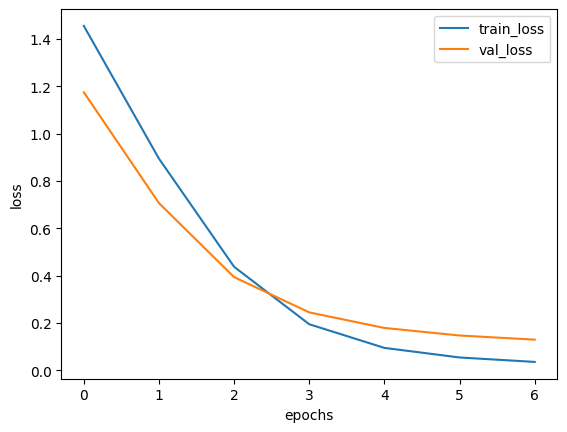

In [17]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


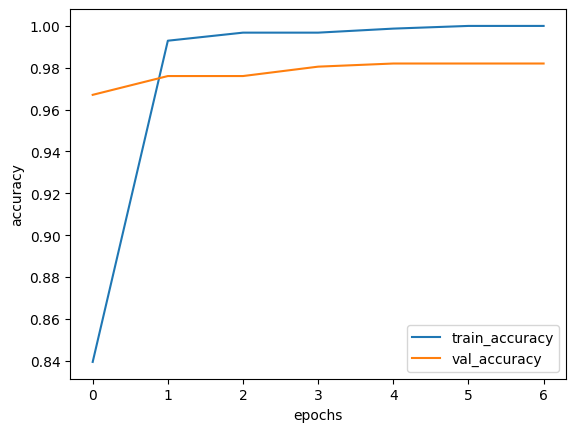

In [18]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='train_accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

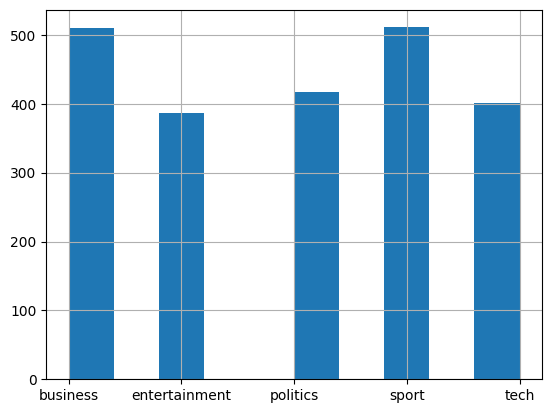

In [19]:
df.labels.hist();